# Random Forest Regressor (RFR)

## 0.0 Python packages

In [380]:
# Packages for preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [381]:
# Packages for modeling
from sklearn.ensemble import RandomForestRegressor

In [382]:
# Packages for the training and testing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

In [383]:
# Packages for model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from numpy import mean
from numpy import absolute

In [384]:
# outlier detection function
def outlier(col, df_, remove) -> list:
    """This function calculates the upper and lower fence
    of any column and can also remove from the dataset"""
    q1 = df_[col].quantile(0.25)
    q3 = df_[col].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (iqr * 1.5)
    upper_fence = q3 + (iqr * 1.5)
    if remove:
        temp = df_[(df_[col] > lower_fence) & (df_[col] < upper_fence)]
        return temp
    return [lower_fence, upper_fence]

## 1.0 Pre-processing

### 1.1 Dataset

In [385]:
# Import the dataset
annual_df = pd.read_csv("data/total-amount-of-food-waste-annually-in-malaysia.csv")
annual_df

,Year,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,Amount_in_tonnes,6205000,6207555,6237006,6191860,6051700,6091120,5490000,5475000,2920000,5475000,3864960,339450,254590,169725


In [386]:
#Transpose the dataframe
annual_df = annual_df.transpose()
annual_df

,0
Year,Amount_in_tonnes
2022,6205000
2021,6207555
2020,6237006
2019,6191860
2018,6051700
2017,6091120
2016,5490000
2015,5475000
2014,2920000


In [387]:
# Sorting the dataframe by Year column
annual_df = annual_df.reset_index()
annual_df.columns = annual_df.iloc[0]
annual_df = annual_df.drop(0)
annual_df = annual_df.sort_values(by = 'Year', ascending = True)
annual_df = annual_df.reset_index()
annual_df.drop(annual_df.columns[0], axis = 1, inplace = True)
annual_df

,Year,Amount_in_tonnes
0,2009,169725
1,2010,254590
2,2011,339450
3,2012,3864960
4,2013,5475000
5,2014,2920000
6,2015,5475000
7,2016,5490000
8,2017,6091120
9,2018,6051700


### 1.2 Checking the existence of outlier in the dataset

In [388]:
out_df = annual_df
out_df = outlier('Amount_in_tonnes', out_df, True)
out_df
print(out_df.compare(annual_df))

Empty DataFrame
Columns: []
Index: []


### 1.3 Exploratory Data Analysis

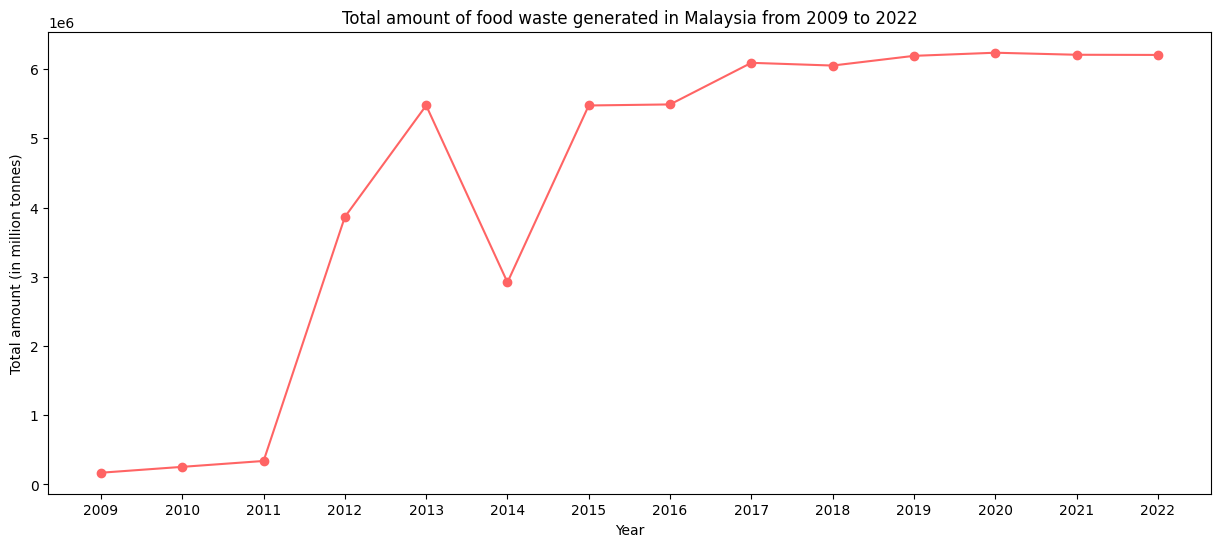

In [389]:
yearAn = list(annual_df['Year'])
amountAn = list(annual_df['Amount_in_tonnes'])

plt.figure(figsize = (15, 6))
lines = plt.plot(yearAn, amountAn)
plt.setp(lines, color = (255/255, 100/255, 100/255), marker = 'o')
plt.xlabel("Year")
plt.ylabel("Total amount (in million tonnes)")
plt.title("Total amount of food waste generated in Malaysia from 2009 to 2022")
plt.show()

## 2.0 Modelling

In [390]:
# Constant for the RFR model parameters
RFR_num_estmtr = 100
RFR_ran_st = 0

### 2.1 Memory recall

#### 2.1.1 Prepare the train data and test data

x_train = x_test = Year (2009 - 2022) <br>
y_train = y_test = Amount_in_tonnes (2009 - 2022) <br>

In [393]:
# Create the training and testing set
x_train = annual_df.iloc[:, 0:1].values.astype(float)
y_train = annual_df.iloc[:, 1:2].values.astype(float)
x_test = x_train
y_test = y_train

In [394]:
# Feature scaling
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(x_train)
Y = sc_Y.fit_transform(y_train)
Y = Y.ravel() # flatten y_train data

#### 2.1.2 Modelling using train data

In [395]:
# Create the RFR model
RFRmodel_memRec1 = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

In [396]:
# Train the model with training set
RFRmodel_memRec1.fit(X, Y) 

RandomForestRegressor(random_state=0)

#### 2.1.3 Make prediction using test data

In [397]:
# Make prediction with testing set
memRec1_pred = sc_Y.inverse_transform(
            RFRmodel_memRec1.predict(
                sc_X.transform(x_test)
            ).reshape(-1, 1)
        )
memRec1_pred

array([[ 305926.75],
       [ 361937.15],
       [ 581491.5 ],
       [3075635.45],
       [4830186.1 ],
       [3814400.  ],
       [4912894.8 ],
       [5476628.4 ],
       [5925827.2 ],
       [6100826.72],
       [6154022.05],
       [6228177.32],
       [6215968.04],
       [6207828.07]])

#### 2.1.4 Model performance evaluation

In [398]:
RFRresult_memcall = list()

In [400]:
# Evaluate the model performance
mae = mean_absolute_error(y_test, memRec1_pred)
rmse = mean_squared_error(y_test, memRec1_pred, squared = False) # squared = False will obtain rmse, squared = True will obtain mse
mape = mean_absolute_percentage_error(y_test, memRec1_pred)

# For the purpose of 3.0 Visualization
RFRresult_memcall.append(mae)
RFRresult_memcall.append(rmse)

print("mean_absolute_error: {:.2f} tonnes".format(mae))
print("root_mean_squared_error: {:.2f} tonnes".format(rmse))
print("mean_absolute_percentage_error: {:.2f}%".format(mape * 100))

mean_absolute_error: 261566.64 tonnes
root_mean_squared_error: 403103.37 tonnes
mean_absolute_percentage_error: 19.39%


#### 2.1.5 Model's predicted value visualization

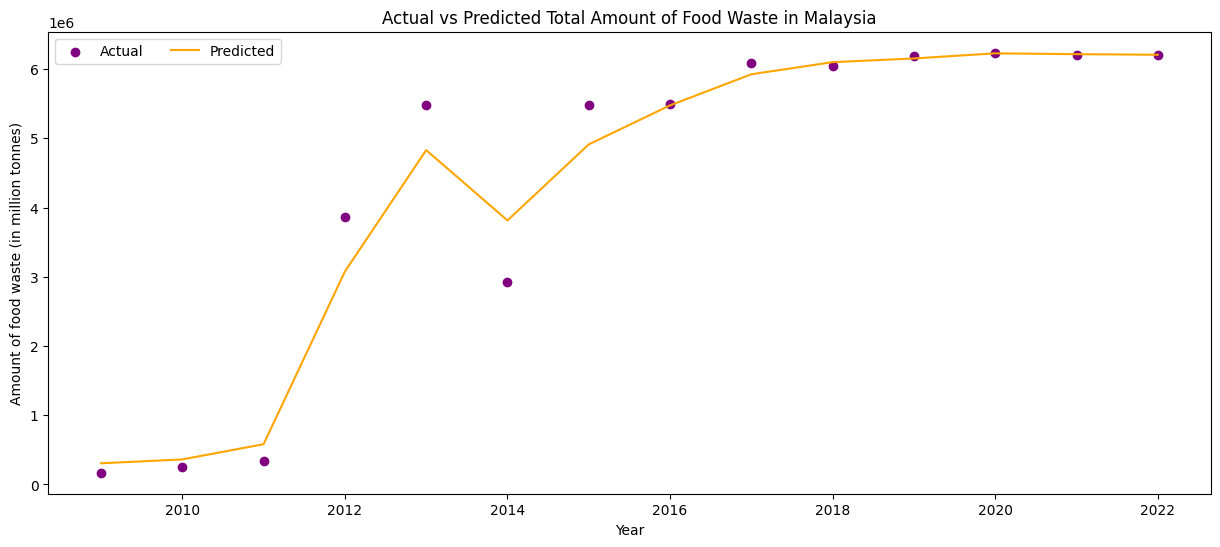

In [401]:
# Visualize actual and predicted values
plt.figure(figsize = (15, 6))
plt.scatter(x_train, y_train, color = 'purple', label = 'Actual')
plt.plot(x_test, memRec1_pred, color = 'orange', label = 'Predicted')
plt.legend(loc = 'upper left', ncol = 2, bbox_to_anchor = (0., 1.))
plt.title('Actual vs Predicted Total Amount of Food Waste in Malaysia')
plt.xlabel('Year')
plt.ylabel('Amount of food waste (in million tonnes)')
plt.show()

#### 2.1.6 Test prediction for 2023

In [402]:
x_test_yr2023 = np.array([[2023]])
x_test_yr2023

array([[2023]])

In [403]:
memRec1_pred23 = sc_Y.inverse_transform(
        RFRmodel_memRec1.predict(
        sc_X.transform(x_test_yr2023)
        ).reshape(-1, 1)
)
memRec1_pred23

array([[6207828.07]])

### 2.2 Hold-out

### Situation 1: Data is not shuffled / not randomized

#### 2.2.1 80% training to 20% testing

##### 2.2.1.1 Prepare the train data and test data

In [404]:
# Prepare the datset to be split
x = annual_df.iloc[:, 0:1].values.astype(float)
y = annual_df.iloc[:, 1:2].values.astype(float)

In [405]:
# Split the data to selected hold-out ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = False)
y_train = y_train.ravel()

##### 2.2.1.2 Modelling using train data

In [406]:
# Create the RFR model
RFRmodel_hout1 = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

In [407]:
# Train the model with training set
RFRmodel_hout1.fit(x_train, y_train) 

RandomForestRegressor(random_state=0)

##### 2.2.1.3  Make prediction using test data 

In [408]:
# Make prediction with testing set
hout1_pred = RFRmodel_hout1.predict(x_test)
hout1_pred

array([6142749.6, 6142749.6, 6142749.6])

##### 2.2.1.4 Model performance evaluation 

In [409]:
RFRresult_holdout = list()

In [411]:
# Evaluate the model performance
mae = mean_absolute_error(y_test, hout1_pred)
rmse = mean_squared_error(y_test, hout1_pred, squared = False)
mape = mean_absolute_percentage_error(y_test, hout1_pred)

# For the purpose of 3.0 Visualization
RFRresult_holdout.append(mae)
RFRresult_holdout.append(rmse)

print("mean_absolute_error: {:.2f} tonnes".format(mae))
print("root_mean_squared_error: {:.2f} tonnes".format(rmse))
print("mean_absolute_percentage_error: {:.2f}%".format(mape * 100))

mean_absolute_error: 73770.73 tonnes
root_mean_squared_error: 75186.70 tonnes
mean_absolute_percentage_error: 1.19%


##### 2.2.1.5 Model's predicted value visualization 

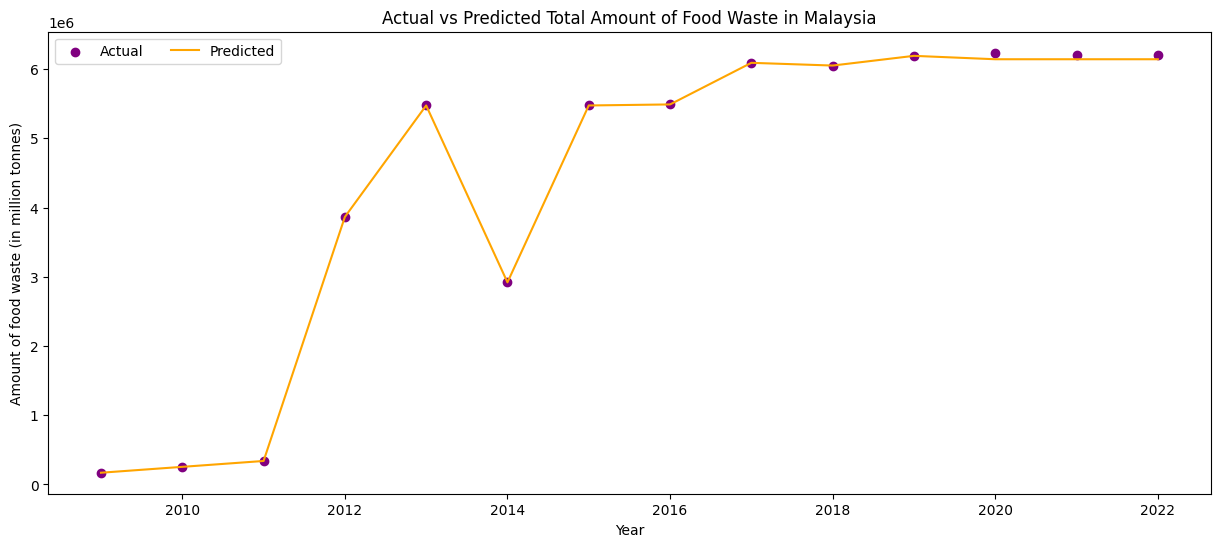

In [412]:
y_predicted = np.concatenate((y_train, hout1_pred))

plt.figure(figsize = (15, 6))
plt.scatter(x, y, color = 'purple', label = 'Actual')
plt.plot(x, y_predicted, color = 'orange', label = 'Predicted')
plt.legend(loc = 'upper left', ncol = 2, bbox_to_anchor = (0., 1.))
plt.title('Actual vs Predicted Total Amount of Food Waste in Malaysia')
plt.xlabel('Year')
plt.ylabel('Amount of food waste (in million tonnes)')
plt.show()

##### 2.2.1.6 Test prediction for 2023

In [413]:
hout1_pred23 = RFRmodel_hout1.predict(x_test_yr2023)
hout1_pred23

array([6142749.6])

#### 2.2.2 90% training to 10% testing

##### 2.2.2.1 Prepare the train data and test data

In [414]:
# Prepare the datset to be split
x = annual_df.iloc[:, 0:1].values.astype(float)
y = annual_df.iloc[:, 1:2].values.astype(float)

In [415]:
# Split the data to selected hold-out ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle = False)
y_train = y_train.ravel()

##### 2.2.2.2 Modelling using train data

In [416]:
# Create the RFR model
RFRmodel_hout2 = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

In [417]:
# Train the model with training set
RFRmodel_hout2.fit(x_train, y_train) 

RandomForestRegressor(random_state=0)

##### 2.2.2.3  Make prediction using test data 

In [418]:
# Make prediction with testing set
hout2_pred = RFRmodel_hout2.predict(x_test)
hout2_pred

array([6220807.06, 6220807.06])

##### 2.2.2.4 Model performance evaluation 

In [419]:
# Evaluate the model performance
mae = mean_absolute_error(y_test, hout2_pred)
rmse = mean_squared_error(y_test, hout2_pred, squared = False)
mape = mean_absolute_percentage_error(y_test, hout2_pred)

print("mean_absolute_error: {:.2f} tonnes".format(mae))
print("root_mean_squared_error: {:.2f} tonnes".format(rmse))
print("mean_absolute_percentage_error: {:.2f}%".format(mape * 100))

mean_absolute_error: 14529.56 tonnes
root_mean_squared_error: 14585.61 tonnes
mean_absolute_percentage_error: 0.23%


##### 2.2.2.5 Model's predicted value visualization 

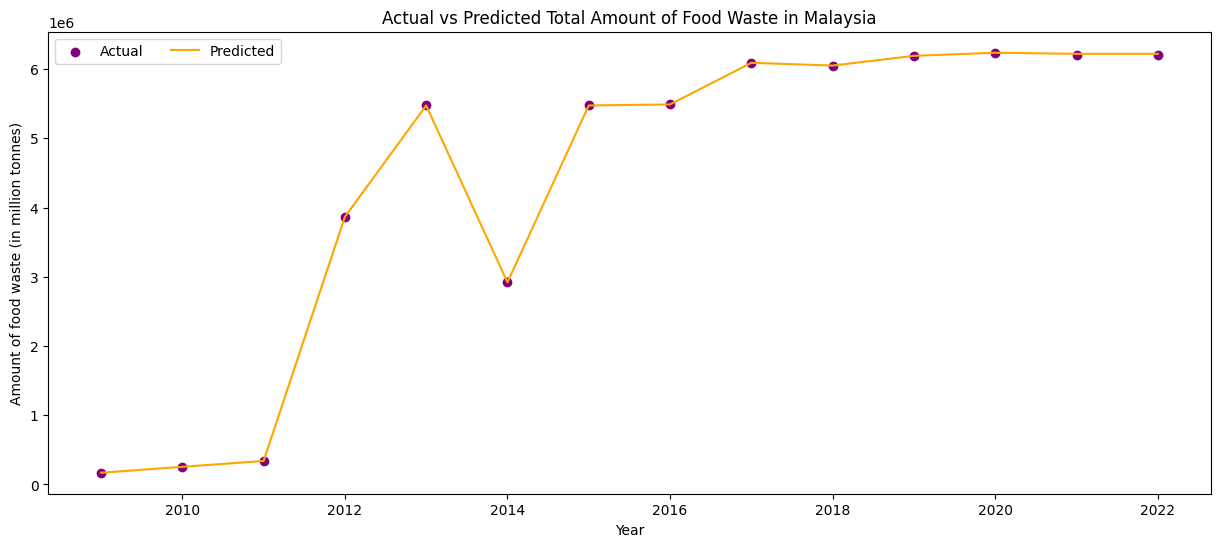

In [420]:
y_predicted = np.concatenate((y_train, hout2_pred))

plt.figure(figsize = (15, 6))
plt.scatter(x, y, color = 'purple', label = 'Actual')
plt.plot(x, y_predicted, color = 'orange', label = 'Predicted')
plt.legend(loc = 'upper left', ncol = 2, bbox_to_anchor = (0., 1.))
plt.title('Actual vs Predicted Total Amount of Food Waste in Malaysia')
plt.xlabel('Year')
plt.ylabel('Amount of food waste (in million tonnes)')
plt.show()

##### 2.2.2.6 Test prediction for 2023

In [421]:
hout2_pred23 = RFRmodel_hout2.predict(x_test_yr2023)
hout2_pred23

array([6220807.06])

### Situation 2: Data is shuffled / randomized

#### 2.2.3 Test random_state {1 - 100}

Go through the model with random data and with 100 random states. By the end, the overall average for all three testing scores are obtained

##### 2.2.3.1 Prepare model for iteration

In [423]:
# Create the RFR model
RFRmodel_hout3 = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

##### 2.2.3.2 Iteration

Splitting data, training the data, predicting the data, and evaluating the prediction

In [424]:
# For (c)(ii)
y_pred_dict = dict()
mae_dict = dict()
rmse_dict = dict()
mape_dict = dict()

# Find overall mean from model 1 until model 100
mae_mean = 0
rmse_mean = 0
mape_mean = 0

for a in range(1, 101):
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = a)
    y_train = y_train.ravel()
    
    # Train the model
    RFRmodel_hout3.fit(x_train, y_train)
    
    # Test the model
    y_pred = RFRmodel_hout3.predict(x_test)
    y_pred_dict[a] = y_pred
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mae_dict[a] = mae
    mae_mean += mae
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    rmse_dict[a] = rmse
    rmse_mean += rmse
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mape_dict[a] = mape
    mape_mean += mape

##### 2.2.3.3 Viewing the results of evaluation

In [425]:
print("Mean of Mean Absolute Error from model 1 to model 100: {:.2f} tonnes".format(mae_mean / 100))
print("Mean of Root Mean Squared Error from model 1 to model 100: {:.2f} tonnes".format(rmse_mean / 100))
print("Mean of Mean Absolute Percentage Error from model 1 to model 100: {:.2f}%".format((mape_mean / 100) * 100))

Mean of Mean Absolute Error from model 1 to model 100: 796582.90 tonnes
Mean of Root Mean Squared Error from model 1 to model 100: 1033209.03 tonnes
Mean of Mean Absolute Percentage Error from model 1 to model 100: 97.49%


#### 2.2.4 Test random_state with  lowest value

From the previous, we able to know the best model by looking at their low testing scores. Accessing the dictionary and get the key. The key here means the random_state value. Then apply it to the prediction model. Since the data are randomized, a temporary dataframe is created to sort the data first, before continuing with visualization.

##### 2.2.4.1 Get keys that produce low scores

In [426]:
# Get key with min value.
mae_min = min(mae_dict, key = mae_dict.get)
rmse_min = min(rmse_dict, key = rmse_dict.get)
mape_min = min(mape_dict, key = mape_dict.get)

print(mae_min)
print(rmse_min)
print(mape_min)

12
12
12


It can be inferred that all three dictionaries return a same value, which is 12. Hence, random_state is set to 12

##### 2.2.4.2 Prepare the  80:20 train data and test data

In [428]:
# Prepare the datset to be split
x = annual_df.iloc[:, 0:1].values.astype(float)
y = annual_df.iloc[:, 1:2].values.astype(float)

In [429]:
# Split the data to selected hold-out ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = False)
y_train = y_train.ravel()

##### 2.2.4.3 Modelling using train data (note to use 12 as random state)

In [430]:
# Create the RFR model
RFRmodel_hout4 = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

In [431]:
# Train the model with training set
RFRmodel_hout4.fit(x_train, y_train) 

RandomForestRegressor(random_state=0)

##### 2.2.4.4  Make prediction using test data 

In [432]:
# Make prediction with testing set
hout4_pred = RFRmodel_hout4.predict(x_test)
hout4_pred

array([6142749.6, 6142749.6, 6142749.6])

##### 2.2.4.5 Model performance evaluation 

In [433]:
# Evaluate the model performance
mae = mean_absolute_error(y_test, hout4_pred)
rmse = mean_squared_error(y_test, hout4_pred, squared = False)
mape = mean_absolute_percentage_error(y_test, hout4_pred)

print("mean_absolute_error: {:.2f} tonnes".format(mae))
print("root_mean_squared_error: {:.2f} tonnes".format(rmse))
print("mean_absolute_percentage_error: {:.2f}%".format(mape * 100))

mean_absolute_error: 73770.73 tonnes
root_mean_squared_error: 75186.70 tonnes
mean_absolute_percentage_error: 1.19%


##### 2.2.4.6 Model's predicted value visualization 

In [434]:
# Combine training set and testing set
x_concat = np.concatenate((x_train, x_test))
y_predicted = np.concatenate((y_train, y_pred))

# Flatten x and y set
x_concat = x_concat.ravel()
y_predicted = y_predicted.ravel()

In [435]:
# Creating a temporary dataframe
temp_df = pd.DataFrame(data = [x_concat, y_predicted], dtype = float)
temp_df = temp_df.transpose()
temp_df = temp_df.rename(columns = {0: 'Year', 1: 'Amount'})
temp_df = temp_df.sort_values(by = 'Year', ascending = True)
temp_df

,Year,Amount
0,2009.0,169725.0
1,2010.0,254590.0
2,2011.0,339450.0
3,2012.0,3864960.0
4,2013.0,5475000.0
5,2014.0,2920000.0
6,2015.0,5475000.0
7,2016.0,5490000.0
8,2017.0,6091120.0
9,2018.0,6051700.0


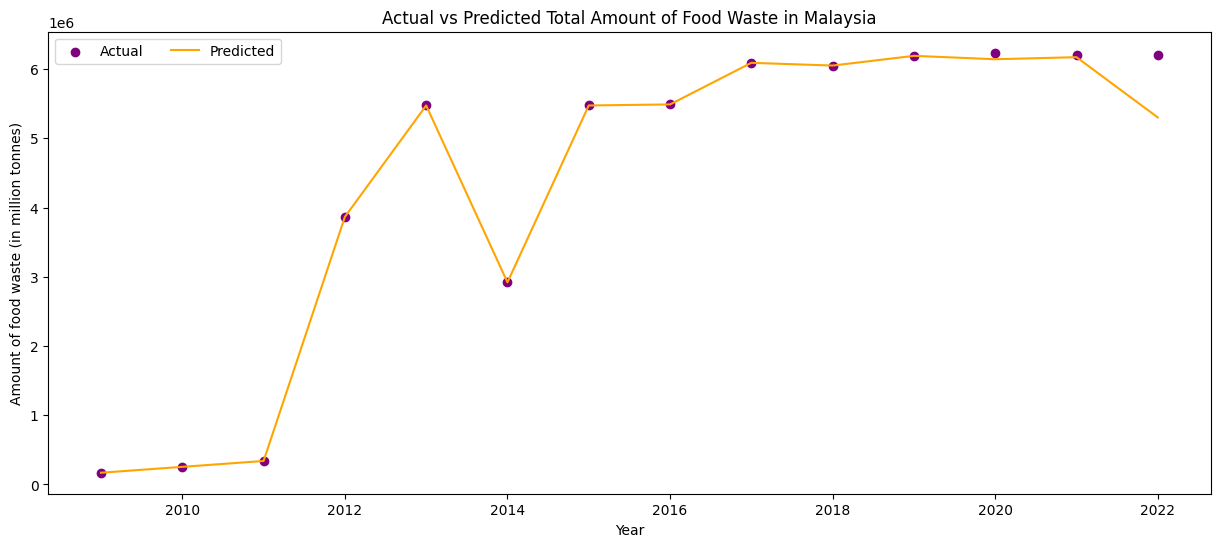

In [436]:
y_temp = list(temp_df['Amount'])

plt.figure(figsize = (15, 6))
plt.scatter(x, y, color = 'purple', label = 'Actual')
plt.plot(x, y_temp, color = 'orange', label = 'Predicted')
plt.legend(loc = 'upper left', ncol = 2, bbox_to_anchor = (0., 1.))
plt.title('Actual vs Predicted Total Amount of Food Waste in Malaysia')
plt.xlabel('Year')
plt.ylabel('Amount of food waste (in million tonnes)')
plt.show()

##### 2.2.4.7 Test prediction for 2023

In [437]:
hout4_pred23 = RFRmodel_hout4.predict(x_test_yr2023)
hout4_pred23

array([6142749.6])

### 2.3 K-fold cross validation

#### 2.3.1 Iterations to find suitable k (unshuffled)

##### 2.3.1.1 Prepare the dataset to be splitted

In [438]:
x = annual_df.iloc[:, 0:1].values.astype(float)
y = annual_df.iloc[:, 1:2].values.astype(float)
y = y.ravel() # flatten y (dependent) data

##### 2.3.1.2 Create the RFR model

In [439]:
RFRmodel_kfold = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

##### 2.3.1.3 Iterations

In [440]:
# Dictionaries for average of all errors
k_mae_dict_non = dict()
k_rmse_dict_non = dict()
k_mape_dict_non = dict()

# Test score dictionaries
ts_mae_dict_non = dict()
ts_rmse_dict_non = dict()
ts_mape_dict_non = dict()

for a in range(2, 8): # Fold 2 - Fold 7
    kfold = KFold(n_splits = a, shuffle = False)

    results1 = cross_validate(RFRmodel_kfold, x, y, scoring = 'neg_mean_absolute_error', cv = kfold)
    results2 = cross_validate(RFRmodel_kfold, x, y, scoring = 'neg_root_mean_squared_error', cv = kfold)
    results3 = cross_validate(RFRmodel_kfold, x, y, scoring = 'neg_mean_absolute_percentage_error', cv = kfold)

    key = str(a)

    ts_mae_dict_non[key] = list(absolute(results1['test_score']))
    ts_rmse_dict_non[key] = list(absolute(results2['test_score']))
    ts_mape_dict_non[key] = list(absolute(results3['test_score']))

    k_mae_dict_non[key] = mean(absolute(results1['test_score']))
    k_rmse_dict_non[key] = mean(absolute(results2['test_score']))
    k_mape_dict_non[key] = mean(absolute(results3['test_score']))

##### 2.3.1.4 Get keys that produce low scores

In [442]:
minimum1 = min(k_mae_dict_non, key = k_mae_dict_non.get)
minimum2 = min(k_rmse_dict_non, key = k_rmse_dict_non.get)
minimum3 = min(k_mape_dict_non, key = k_mape_dict_non.get)

print(minimum1)
print(minimum2)
print(minimum3)

7
7
7


##### 2.3.1.5 Visualization

In [444]:
dictlist = [k_mae_dict_non, k_rmse_dict_non]
kf2 = []
kf3 = []
kf4 = []
kf5 = []
kf6 = []
kf7 = []

for dictionary in dictlist:
    attempt = dictionary.get('2')
    kf2.append(attempt)
    attempt = dictionary.get('3')
    kf3.append(attempt)
    attempt = dictionary.get('4')
    kf4.append(attempt)
    attempt = dictionary.get('5')
    kf5.append(attempt)
    attempt = dictionary.get('6')
    kf6.append(attempt)
    attempt = dictionary.get('7')
    kf7.append(attempt)

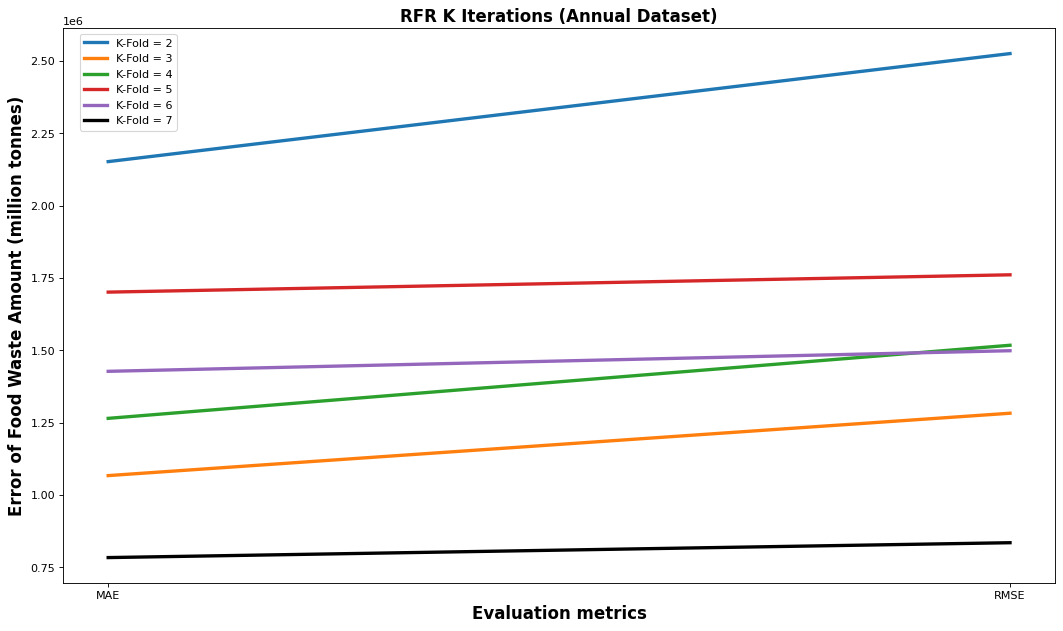

In [445]:
dictlist = ['MAE', 'RMSE']

plt.figure(figsize = (16, 9), dpi = 80)
lines1 = plt.plot(dictlist, kf2, label = 'K-Fold = 2')
lines2 = plt.plot(dictlist, kf3, label = 'K-Fold = 3')
lines3 = plt.plot(dictlist, kf4, label = 'K-Fold = 4')
lines4 = plt.plot(dictlist, kf5, label = 'K-Fold = 5')
lines5 = plt.plot(dictlist, kf6, label = 'K-Fold = 6')
lines6 = plt.plot(dictlist, kf7, label = 'K-Fold = 7')
plt.grid(False)
plt.setp(lines1, linewidth = 3)
plt.setp(lines2, linewidth = 3)
plt.setp(lines3, linewidth = 3)
plt.setp(lines4, linewidth = 3)
plt.setp(lines5, linewidth = 3)
plt.setp(lines6, color = 'black', linewidth = 3)
plt.xlabel('Evaluation metrics', fontweight = 'bold', fontsize = 15)
plt.ylabel('Error of Food Waste Amount (million tonnes)', fontweight = 'bold', fontsize = 15)
plt.title('RFR K Iterations (Annual Dataset)', fontweight = 'bold', fontsize = 15)
plt.legend(bbox_to_anchor = [.05, .1, .07, .9])
plt.show()

#### 2.3.2 Use lowest score Fold=7 (unshuffled)

##### 2.3.2.1 Prepare the dataset to be splitted

In [446]:
# Prepare the datset to be split
x = annual_df.iloc[:, 0:1].values.astype(float)
y = annual_df.iloc[:, 1:2].values.astype(float)
y = y.ravel() # flatten y (dependent) data

##### 2.3.2.2 Create the RFR model

In [447]:
# Create the RFR model
RFRmodel_kfold = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

##### 2.3.2.3 Create the k-fold object

In [448]:
# Create the k-fold object
fold = 7
kfold = KFold(n_splits = fold, shuffle = False)

##### 2.3.2.4 Model evaluation

Mean Absolute Error

In [449]:
results1 = cross_validate(RFRmodel_kfold, x, y, scoring = 'neg_mean_absolute_error', cv = kfold)

for a in range(len(results1['test_score'])):
    print(f"The mean absolute error score for fold %d: {results1['test_score'][a]}" % (a + 1))

print(f"The average of mean absolute error for all 7 models is %.2f tonnes" % mean(absolute(results1['test_score'])))

The mean absolute error score for fold 1: -1525534.8
The mean absolute error score for fold 2: -333000.32500000007
The mean absolute error score for fold 3: -2253615.9749999996
The mean absolute error score for fold 4: -933006.9000000001
The mean absolute error score for fold 5: -335771.65500000026
The mean absolute error score for fold 6: -94074.5
The mean absolute error score for fold 7: -14529.55999999959
The average of mean absolute error for all 7 models is 784219.10 tonnes


Root Mean Squared Error

In [450]:
results2 = cross_validate(RFRmodel_kfold, x, y, scoring = 'neg_root_mean_squared_error', cv = kfold)

for a in range(len(results2['test_score'])):
    print(f"The root mean squared error score for fold %d: {results2['test_score'][a]}" % (a + 1))

print(f"The average of root mean squared error for all 7 models is %.2f tonnes" % mean(absolute(results2['test_score'])))

The root mean squared error score for fold 1: -1526124.8124145318
The root mean squared error score for fold 2: -333311.4928274621
The root mean squared error score for fold 3: -2263071.580261411
The root mean squared error score for fold 4: -1171330.3110216607
The root mean squared error score for fold 5: -443799.93264943856
The root mean squared error score for fold 6: -96881.55611410258
The root mean squared error score for fold 7: -14585.613461338817
The average of root mean squared error for all 7 models is 835586.47 tonnes


Mean Absolute Percentage Error

In [451]:
results3 = cross_validate(RFRmodel_kfold, x, y, scoring = 'neg_mean_absolute_percentage_error', cv = kfold)

for a in range(len(results3['test_score'])):
    print(f"The mean absolute percentage error score for fold %d: {results3['test_score'][a]}" % (a + 1))

print(f"The average of mean absolute percentage error for all 7 models is %.2f" % (mean(absolute(results3['test_score'])) * 100))

The mean absolute percentage error score for fold 1: -7.531867602229749
The mean absolute percentage error score for fold 2: -0.5142325018011287
The mean absolute percentage error score for fold 3: -0.5751889634703196
The mean absolute percentage error score for fold 4: -0.17035611937021236
The mean absolute percentage error score for fold 5: -0.055149148341968914
The mean absolute percentage error score for fold 6: -0.015151798925485412
The mean absolute percentage error score for fold 7: -0.002341149517757873
The average of mean absolute percentage error for all 7 models is 126.63


##### 2.3.2.5 Visualization

In [452]:
xaxis = list()

for a in range(fold):
    xaxis.append('Fold %d' % (a + 1))

Mean Absolute Error

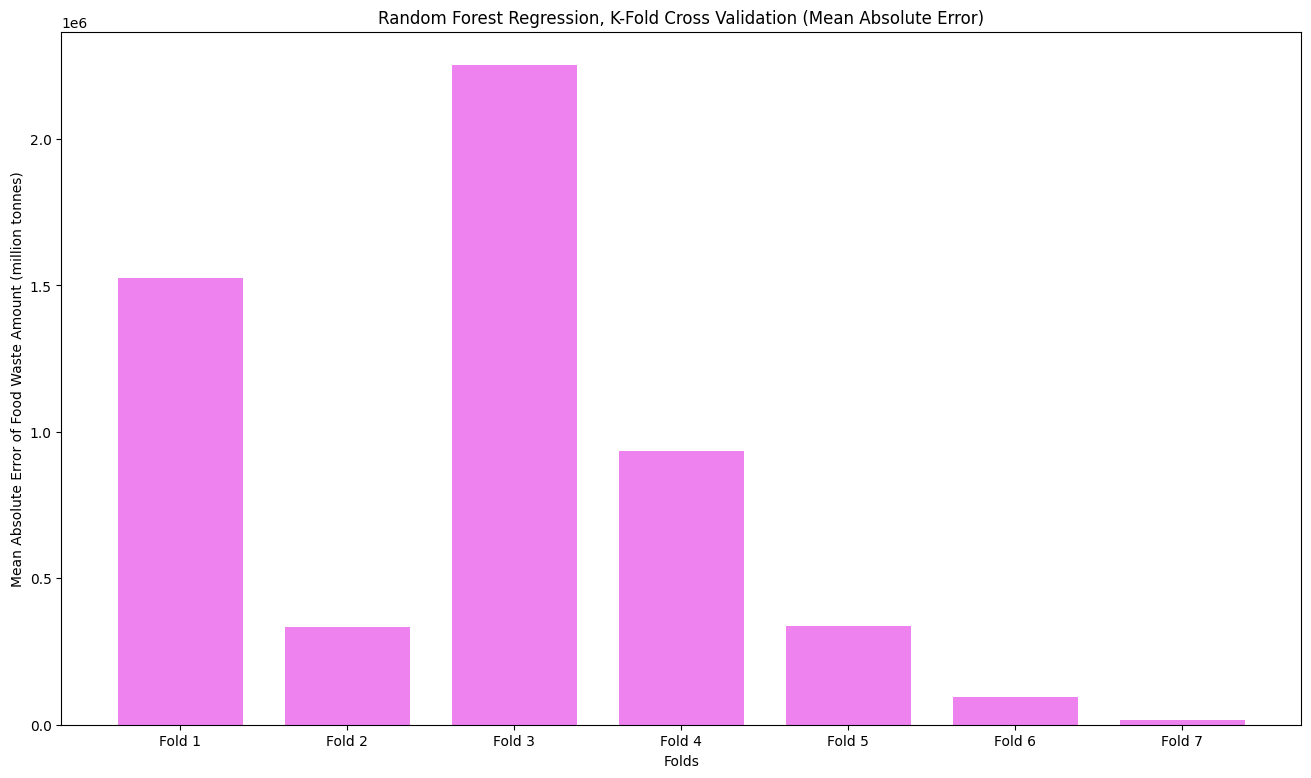

In [453]:
bar_width = .75

plt.figure(figsize = (16, 9))
plt.bar(xaxis, absolute(results1['test_score']), bar_width, color = "violet")
plt.xlabel("Folds")
plt.ylabel("Mean Absolute Error of Food Waste Amount (million tonnes)")
plt.title("Random Forest Regression, K-Fold Cross Validation (Mean Absolute Error)")
plt.show()

Root Mean Squared Error

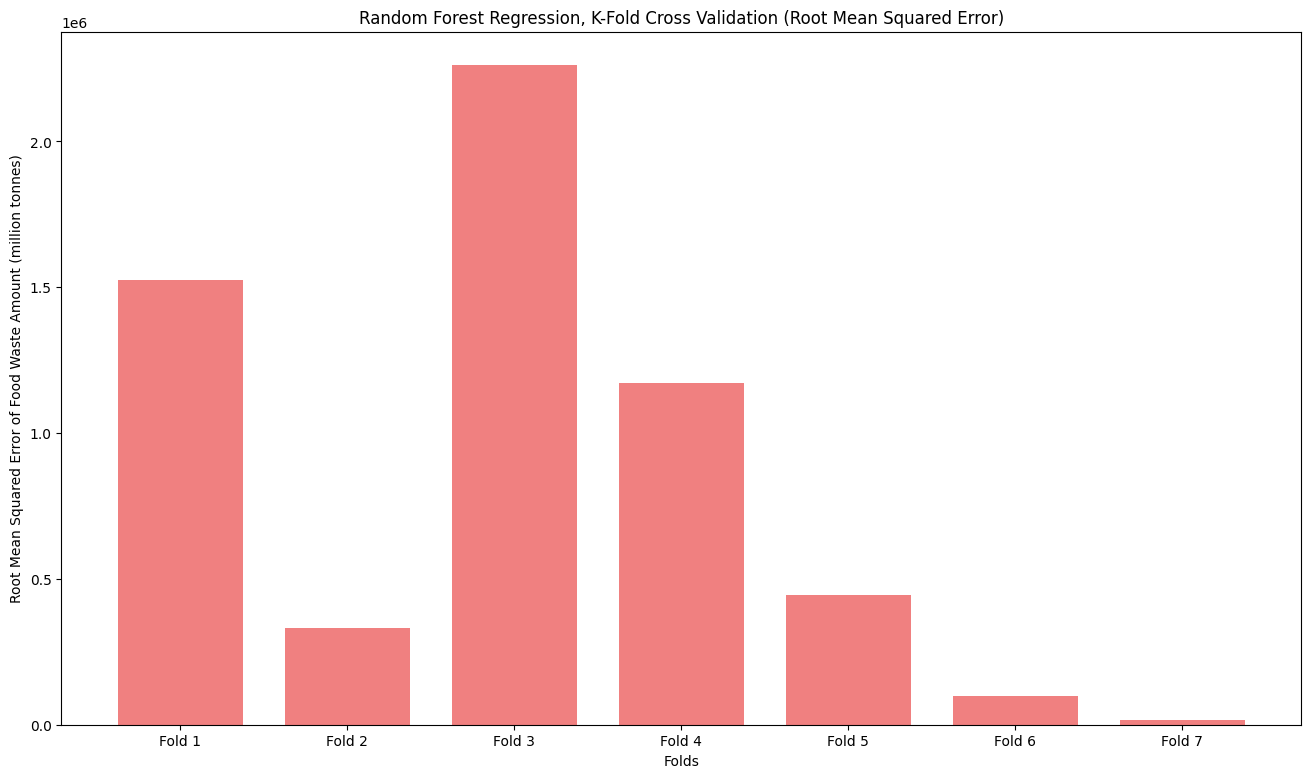

In [454]:
bar_width = .75

plt.figure(figsize = (16, 9))
plt.bar(xaxis, absolute(results2['test_score']), bar_width, color = "lightcoral")
plt.xlabel("Folds")
plt.ylabel("Root Mean Squared Error of Food Waste Amount (million tonnes)")
plt.title("Random Forest Regression, K-Fold Cross Validation (Root Mean Squared Error)")
plt.show()

Mean Absolute Percentage Error

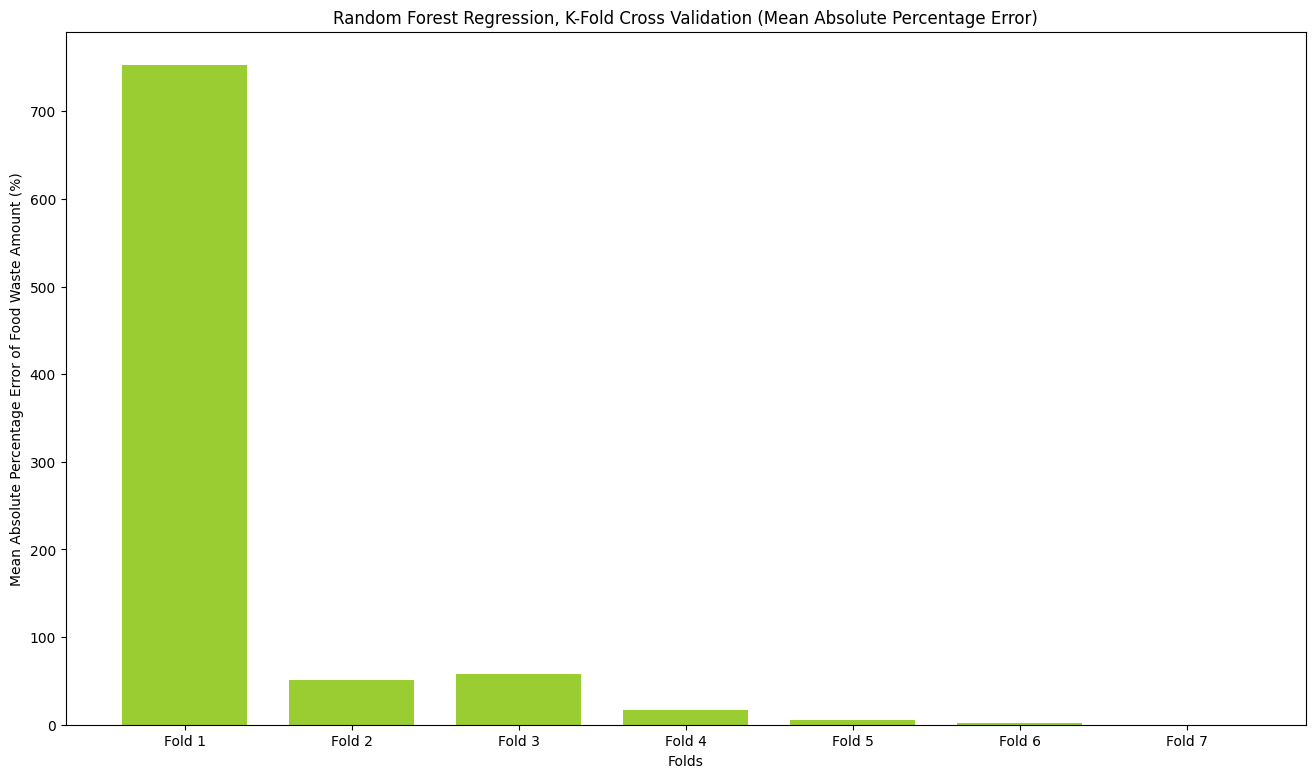

In [456]:
bar_width = .75

plt.figure(figsize = (16, 9))
plt.bar(xaxis, absolute(results3['test_score']) * 100, bar_width, color = "yellowgreen")
plt.xlabel("Folds")
plt.ylabel("Mean Absolute Percentage Error of Food Waste Amount (%)")
plt.title("Random Forest Regression, K-Fold Cross Validation (Mean Absolute Percentage Error)")
plt.show()

##### 2.3.2.6 Test prediction for 2023

In [457]:
preds = []
kfold = KFold(n_splits = fold, shuffle = False)
for train_index, test_index in kfold.split(x):
    x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    RFRmodel_kfold.fit(x_train, y_train)
    prediction = RFRmodel_kfold.predict(x_test)
    preds.append(prediction)
print('Predictions:' , preds)

Train Index:  [ 2  3  4  5  6  7  8  9 10 11 12 13] 

Test Index:  [0 1]
Train Index:  [ 0  1  4  5  6  7  8  9 10 11 12 13] 

Test Index:  [2 3]
Train Index:  [ 0  1  2  3  6  7  8  9 10 11 12 13] 

Test Index:  [4 5]
Train Index:  [ 0  1  2  3  4  5  8  9 10 11 12 13] 

Test Index:  [6 7]
Train Index:  [ 0  1  2  3  4  5  6  7 10 11 12 13] 

Test Index:  [8 9]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 12 13] 

Test Index:  [10 11]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11] 

Test Index:  [12 13]
Predictions: [array([1737692.3, 1737692.3]), array([ 658051.2 , 3517560.55]), array([3014724.85, 4966956.8 ]), array([3833817.4, 5265168.8]), array([5465148.8 , 6006127.89]), array([6074633.3, 6166083.7]), array([6220807.06, 6220807.06])]


In [458]:
kfold_pred23 = RFRmodel_kfold.predict(x_test_yr2023)
kfold_pred23

array([6220807.06])

### 2.4 Leave-One-Out cross validation

#### 2.4.1 Prepare the dataset to be splitted

In [459]:
# Prepare the datset to be split
x = annual_df.iloc[:, 0:1].values.astype(float)
y = annual_df.iloc[:, 1:2].values.astype(float)
y = y.ravel() # flatten y (dependent) data

#### 2.4.2 Create the RFR model

In [460]:
# Create the RFR model
RFRmodel_loout = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

#### 2.4.3 Create the leave-one-out object

In [461]:
# Create the leave-one-out object
loo = LeaveOneOut()
fold = loo.get_n_splits(x)
fold

14

#### 2.4.4 Model evaluation

In [462]:
RFRresult_loout = list()

Mean Absolute Error

In [463]:
results1 = cross_validate(RFRmodel_loout, x, y, scoring = 'neg_mean_absolute_error', cv = loo)

for a in range(len(results1['test_score'])):
    print(f"The mean absolute error score for fold %d: {results1['test_score'][a]}" % (a + 1))

print(f"The average of mean absolute error for all 14 models is %.2f tonnes" % mean(absolute(results1['test_score'])))

The mean absolute error score for fold 1: -465759.9
The mean absolute error score for fold 2: -327429.94999999995
The mean absolute error score for fold 3: -663474.25
The mean absolute error score for fold 4: -2282447.4
The mean absolute error score for fold 5: -2147273.45
The mean absolute error score for fold 6: -2465008.8
The mean absolute error score for fold 7: -1625438.7999999998
The mean absolute error score for fold 8: -65665.0
The mean absolute error score for fold 9: -453173.33999999985
The mean absolute error score for fold 10: -14880.78000000026
The mean absolute error score for fold 11: -74691.0700000003
The mean absolute error score for fold 12: -47233.799999999814
The mean absolute error score for fold 13: -19343.679999999702
The mean absolute error score for fold 14: -7902.040000000037
The average of mean absolute error for all 14 models is 761408.73 tonnes


Root Mean Squared Error

In [464]:
results2 = cross_validate(RFRmodel_loout, x, y, scoring = 'neg_root_mean_squared_error', cv = loo)

for a in range(len(results2['test_score'])):
    print(f"The root mean squared error score for fold %d: {results2['test_score'][a]}" % (a + 1))

print(f"The average of root mean squared error for all 14 models is %.2f tonnes" % mean(absolute(results2['test_score'])))

The root mean squared error score for fold 1: -465759.9
The root mean squared error score for fold 2: -327429.94999999995
The root mean squared error score for fold 3: -663474.25
The root mean squared error score for fold 4: -2282447.4
The root mean squared error score for fold 5: -2147273.45
The root mean squared error score for fold 6: -2465008.8
The root mean squared error score for fold 7: -1625438.7999999998
The root mean squared error score for fold 8: -65665.0
The root mean squared error score for fold 9: -453173.33999999985
The root mean squared error score for fold 10: -14880.78000000026
The root mean squared error score for fold 11: -74691.0700000003
The root mean squared error score for fold 12: -47233.799999999814
The root mean squared error score for fold 13: -19343.679999999702
The root mean squared error score for fold 14: -7902.040000000037
The average of root mean squared error for all 14 models is 761408.73 tonnes


Mean Absolute Percentage Error

In [465]:
results3 = cross_validate(RFRmodel_loout, x, y, scoring = 'neg_mean_absolute_percentage_error', cv = loo)

for a in range(len(results3['test_score'])):
    print(f"The mean absolute percentage error score for fold %d: {results3['test_score'][a]}" % (a + 1))

print(f"The average of mean absolute percentage error for all 14 models is %.2f" % (mean(absolute(results3['test_score'])) * 100))

The mean absolute percentage error score for fold 1: -2.744203269995581
The mean absolute percentage error score for fold 2: -1.2861068777249693
The mean absolute percentage error score for fold 3: -1.954556635734276
The mean absolute percentage error score for fold 4: -0.5905487767014406
The mean absolute percentage error score for fold 5: -0.3921960639269407
The mean absolute percentage error score for fold 6: -0.8441810958904109
The mean absolute percentage error score for fold 7: -0.29688379908675794
The mean absolute percentage error score for fold 8: -0.011960837887067395
The mean absolute percentage error score for fold 9: -0.07439901692956301
The mean absolute percentage error score for fold 10: -0.0024589421154386803
The mean absolute percentage error score for fold 11: -0.012062784042274906
The mean absolute percentage error score for fold 12: -0.00757315288777978
The mean absolute percentage error score for fold 13: -0.003116151206070619
The mean absolute percentage error sc

#### 2.4.5 Visualization

In [466]:
xaxis = list()

for a in range(fold):
    xaxis.append('Fold %d' % (a + 1))

Mean Absolute Error

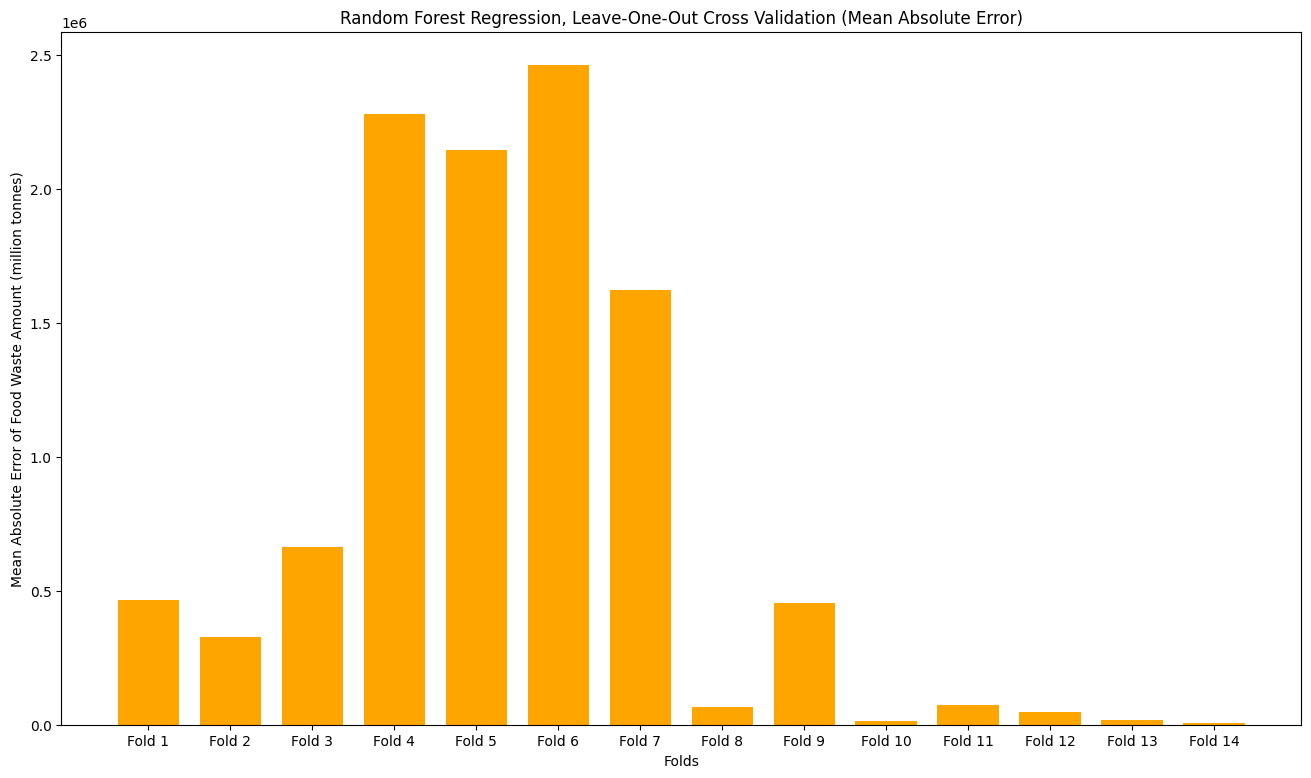

In [467]:
bar_width = .75

plt.figure(figsize = (16, 9))
plt.bar(xaxis, absolute(results1['test_score']), bar_width, color = "orange")
plt.xlabel("Folds")
plt.ylabel("Mean Absolute Error of Food Waste Amount (million tonnes)")
plt.title("Random Forest Regression, Leave-One-Out Cross Validation (Mean Absolute Error)")
plt.show()

Root Mean Squared Error

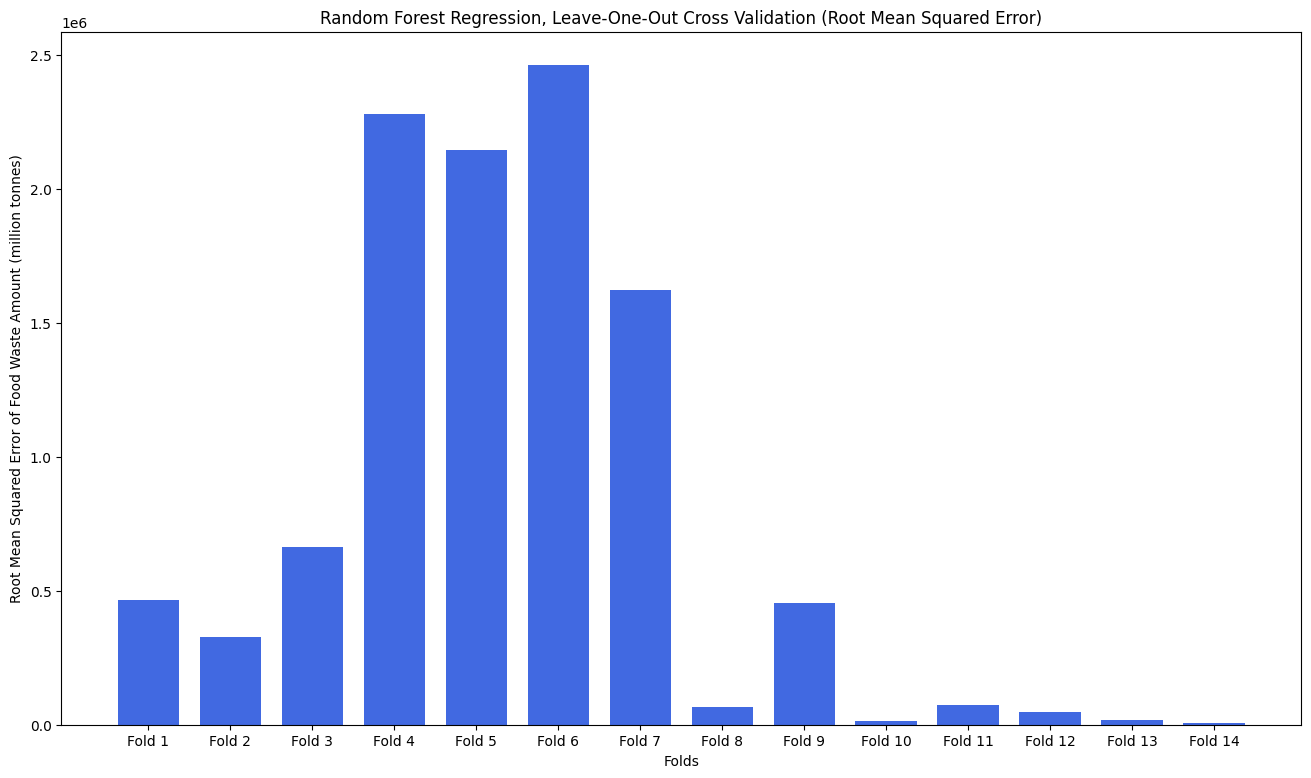

In [468]:
bar_width = .75

plt.figure(figsize = (16, 9))
plt.bar(xaxis, absolute(results2['test_score']), bar_width, color = "royalblue")
plt.xlabel("Folds")
plt.ylabel("Root Mean Squared Error of Food Waste Amount (million tonnes)")
plt.title("Random Forest Regression, Leave-One-Out Cross Validation (Root Mean Squared Error)")
plt.show()

Mean Absolute Percentage Error

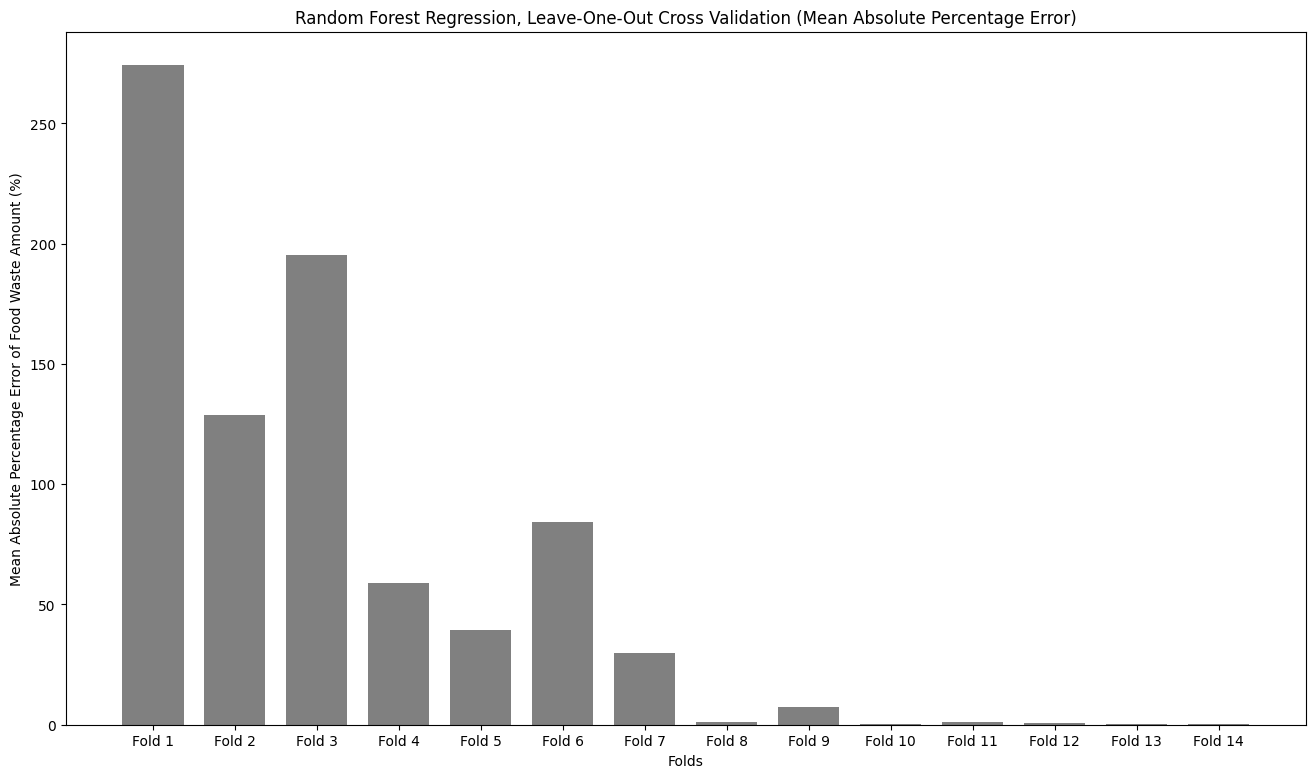

In [469]:
bar_width = .75

plt.figure(figsize = (16, 9))
plt.bar(xaxis, absolute(results3['test_score']) * 100, bar_width, color = "gray")
plt.xlabel("Folds")
plt.ylabel("Mean Absolute Percentage Error of Food Waste Amount (%)")
plt.title("Random Forest Regression, Leave-One-Out Cross Validation (Mean Absolute Percentage Error)")
plt.show()

#### 2.4.6 Test prediction for year 2023

In [470]:
preds = []
for train_index, test_index in loo.split(x):
    x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    RFRmodel_loout.fit(x_train, y_train)
    prediction = RFRmodel_loout.predict(x_test)
    preds.append(prediction)
print('Predictions:' , preds)

Train Index:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13] 

Test Index:  [0]
Train Index:  [ 0  2  3  4  5  6  7  8  9 10 11 12 13] 

Test Index:  [1]
Train Index:  [ 0  1  3  4  5  6  7  8  9 10 11 12 13] 

Test Index:  [2]
Train Index:  [ 0  1  2  4  5  6  7  8  9 10 11 12 13] 

Test Index:  [3]
Train Index:  [ 0  1  2  3  5  6  7  8  9 10 11 12 13] 

Test Index:  [4]
Train Index:  [ 0  1  2  3  4  6  7  8  9 10 11 12 13] 

Test Index:  [5]
Train Index:  [ 0  1  2  3  4  5  7  8  9 10 11 12 13] 

Test Index:  [6]
Train Index:  [ 0  1  2  3  4  5  6  8  9 10 11 12 13] 

Test Index:  [7]
Train Index:  [ 0  1  2  3  4  5  6  7  9 10 11 12 13] 

Test Index:  [8]
Train Index:  [ 0  1  2  3  4  5  6  7  8 10 11 12 13] 

Test Index:  [9]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 11 12 13] 

Test Index:  [10]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 12 13] 

Test Index:  [11]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 13] 

Test Index:  [12]
Train Index:  [ 0  1  2  3  4  5  6

In [471]:
loo_pred23 = RFRmodel_loout.predict(x_test_yr2023)
loo_pred23

array([6212902.04])